# chapter 05 | 회귀

## 01. 회귀 소개
- 일반 선형 회귀
- 릿지
- 라쏘
- 엘라스틱넷
- 로지스틱 회귀

## 02. 단순 선형 회귀를 통한 회귀 이해
#### 회귀계수 (intercept)
단순 선형 회귀 직선에서의 계수 $w_{0}, w_{1}$
$$\hat{Y} = w_{0} + w_{1}*X$$
#### 오류 종류
- MAE
- RSS(Residual Sum of Sqaure, 오차 제곱의 합) = 비용 (Cost)
$$RSS(w_{0}, w_{1}) = \frac{1}{N} \sum_{i=1}^{N}{(y_{i}-(w_{0}+w_{1} * x_{i}))^{2}}$$
$$RSS(w_{0}, w_{1}) = 비용 함수(Cost Function), 손실함수(Loss Function)$$

## 03. 비용 최소화하기 - 경사하강법(Gradient Descent) 소개
#### 경사하강법의 과정
1. 임의의 $w_{0}, w_{1}$ 값을 설정하고 첫 손실함수 값을 계산
2. $w_{1} = w_{1} + \eta \frac{2}{N} \sum_{i=1}^{N}{x_{i} *(y_{i} - \hat{y_{i}}) }$,
$w_{0} = w_{0} + \eta \frac{2}{N} \sum_{i=1}^{N}{(y_{i} - \hat{y_{i}}) }$로 업데이트한 후 다시 손실함수 값을 계산
3. 손실 함수의 값이 감소했으면 다시 2.과정을 반복, 더 이상 손실함수 값이 감소하지 않으면 그때 $w_{0}, w_{1}$을 구하고 반복을 중지

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

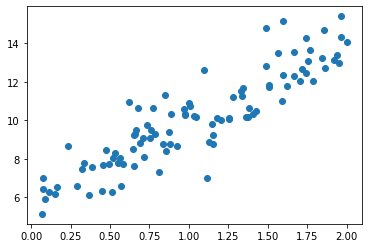

In [4]:
X = 2*np.random.rand(100,1)
y = 4*X + 6 + np.random.randn(100,1)

plt.scatter(X,y)

In [3]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum((y-y_pred)**2)/N
    return cost

In [9]:
def get_weight_updates(w1, w0, X, y, learning_rate = 0.01):
    N = len(y)
    
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred
    
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    w0_factors = np.ones((N,1))
    
    w1_update = -(2/N) * learning_rate * np.dot(X.T, diff)
    w0_update = -(2/N) * learning_rate * np.dot(w0_factors.T, diff)
    
    return w1_update, w0_update

In [10]:
def gradient_descent_steps(X,y, iters=1000):
    
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    for idx in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X,y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [11]:
w1, w0 = gradient_descent_steps(X,y, iters=1000)
print(w1, w0)
y_pred = w1[0,0] *X + w0
print(get_cost(y, y_pred))

[[4.12514281]] [[5.77424573]]
1.1251875232912731


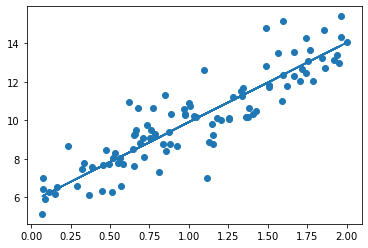

In [12]:
plt.scatter(X,y)
plt.plot(X, y_pred)

## 06. 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷

- 다항회귀에서 deg=1일 경우, 과소적합(underfitting) 
$$y = w_{1}x_{1} + w_{0}$$
- deg=15일 경우, 과대적합(overfitting)
$$y = w_{15}x_{15} + w_{14}x_{14} + ... + w_{1}x_{1}+w_{0}$$

<img src="https://media.vlpt.us/images/joo4438/post/c759a5f6-d3c5-4c33-ade9-78c4cfec4b85/image.png" >

#### → 최적 모델을 위한 손실함수 구성 요소 = 학습 데이터 잔차 최소화 + 회귀계수 크기 제어  
손실 함수 목표 = Min(RSS(W)) + alpha * $\Vert W\Vert _{2}^{2}$
- alpha가 0(또는 매우 작은 값)이라면, 기존과 동일한 손실함수
- alpha가 매우 크다면, W 값을 작게 만들어야 손실함수를 최소화할 수 있음
→ alpha 값으로 페널티를 부과해 회귀 계수 값의 크기(절댓값)를 감소시켜 과적합을 개선하는 방식 = 규제(Regulation)

#### 1. L1 라쏘(Lass)
- $\Vert W\Vert _{1}$ : <U>W의 절댓값</U>에 대해 패널티를 부여
- 영향력이 크지 않은 회귀 계수 값을 0으로 변환

#### 2. L2 릿지(Ridge)
- $\Vert W\Vert _{2}^{2}$ : <U>W의 제곱</U>에 대해 패널티를 부여

### 릿지 회귀
보스턴 주택 가격 데이터 세트

In [21]:
# pp.306~308
from sklearn.datasets import load_boston

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF['PRICE'] = boston.target
print(bostonDF.shape)
# bostonDF.head()

y_target = bostonDF['PRICE']
X_data = bostonDF.drop('PRICE', axis=1)

(506, 14)


In [23]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha=10)
scores = cross_val_score(ridge, X_data, y_target, scoring = 'neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(np.abs(scores))
avg_rmse = np.mean(rmse_scores)

print(np.round(rmse_scores,4))
print(np.round(avg_rmse,4))

# LinearRegression : 5.836

[3.3796 4.9289 5.305  8.6371 5.3401]
5.5182


#### alpha 변화에 따른 RMSE와 회귀 계수 값의 변화
- 회귀 계수 값 추출 : model.coef_

In [34]:
alphas = [0,0.1,1, 10,100]

for alpha in alphas : 
    ridge = Ridge(alpha = alpha)
    scores = cross_val_score(ridge, X_data, y_target, scoring = 'neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(np.abs(scores))
    avg_rmse = np.mean(rmse_scores)
    print("alpha = {}\t{:.4f}".format(alpha, avg_rmse))

alpha = 0	5.8287
alpha = 0.1	5.7885
alpha = 1	5.6526
alpha = 10	5.5182
alpha = 100	5.3296


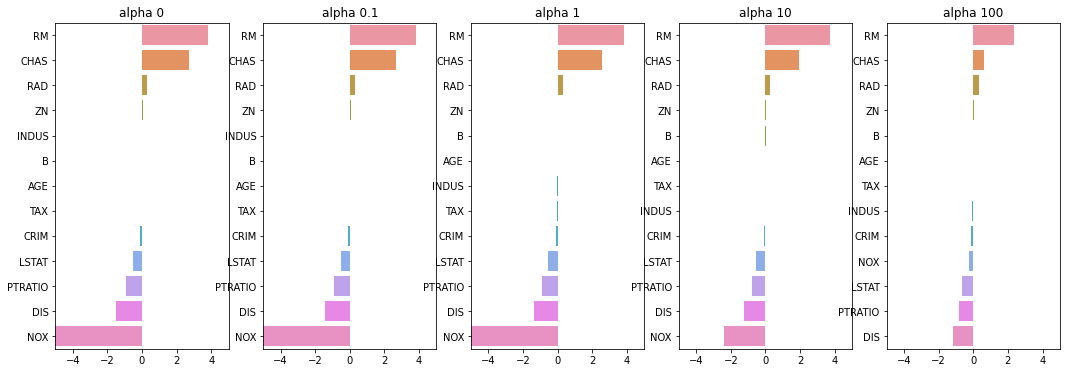

In [61]:
fig, axes = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()

for idx, alpha in enumerate(alphas) : 
    ridge = Ridge(alpha = alpha)

    ridge.fit(X_data, y_target)
    coeff = pd.Series(ridge.coef_, index = X_data.columns)
    coeff = coeff.sort_values(ascending=False)
    
    coeff_df["alpha_"+str(alpha)] = coeff
    
    axes[idx].set_title("alpha "+str(alpha))
    axes[idx].set_xlim(-5,5)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axes[idx])

In [62]:
coeff_df

,alpha_0,alpha_0.1,alpha_1,alpha_10,alpha_100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


#### → alpha 값이 증가하면서 회귀 계수가 지속적으로 작아지지만 0이 되지는 않는다

### 라쏘 회귀
- 목표 : RSS(W) + alpha * $\Vert W \Vert _{1}$ 을 최소화하는 W 찾기
- 릿지는 회귀 계수의 크기(절댓값)을 감소시키는데 반해, 라쏘는 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들어 제거
- 적절한 피처만 회귀에 포함시킴 (피처 선택의 특징)

In [80]:
from sklearn.linear_model import Lasso, ElasticNet

def get_linear_reg_eval(model_name, alphas, X_data, y_target):
    
    coeff_df = pd.DataFrame()
    
    for idx, alpha in enumerate(alphas):
        if model_name == 'Ridge' : model = Ridge(alpha = alpha)
        elif model_name == 'Lasso' : model = Lasso(alpha = alpha)
        elif model_name == 'ElasticNet' : model = ElasticNet(alpha = alpha, l1_ratio=0.7)
        
        neg_mse_scores = cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(np.abs(neg_mse_scores)))
#         print(avg_rmse)

        model.fit(X_data, y_target)
        coeff = pd.Series(model.coef_, index = X_data.columns)
        coeff['avg_rmse'] = avg_rmse 
        
        coeff_df["alpha:"+str(alpha)] = coeff
        
    return coeff_df


In [92]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval("Lasso", lasso_alphas, X_data, y_target)

# columns 순으로 정렬
# sort_column = 'alpha:'+str(lasso_alphas[2])
# coeff_lasso_df.sort_values(by=sort_column, ascending=False)

coeff_lasso_df

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
RM,3.789725,3.703202,2.498212,0.949811,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
DIS,-1.176583,-1.160538,-0.936605,-0.668790,-0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602


#### → alpha 값이 증가하면서 일부 회귀 계수는 아예 0으로 바뀐다. (피처 선택)

### 엘라스틱넷 회귀
- 목표 : RSS(W) + alpha2 * $\Vert W \Vert _{2}^{2}$ +alpha1 * $\Vert W \Vert_{1}$을 최소화하는 W
- 필요성 : 라쏘 회귀가 서로 상관관계가 높은 피처들의 경우에 이들 중에서 중요 피처만을 선택하고 다른 피처들은 모두 회귀 계수를 0으로 만드는 성향이 강함 → alpha 값에 따라 회귀 계수 값이 급격히 변동 → 라쏘 + L2 규제 = 엘라스틱넷
- 단점 : 수행시간 오래걸림
- 파라미터 $l1\_ratio = \frac{alpha1}{(alpha1+alpha2)}$ 
    - 0 → L2(라쏘)
    - 1 → L1(릿지)
    
cf. get_linear_reg_eval에서 ElasticNet 모델의 경우 l1_ratio = 0.7로 고정시킴

In [97]:
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', alphas = elastic_alphas, X_data = X_data, y_target = y_target)
coeff_elastic_df

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000
RM,3.574162,3.414154,1.918419,0.938789,0.000000
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
DIS,-1.189438,-1.173647,-0.975902,-0.725174,-0.031208
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417


#### → alpha값에 따른 피처들의 회귀 계수들 값이 라쏘보다는 상대적으로 0이 되는 값이 적음